In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats
import pyodbc

In [7]:
connection = pyodbc.connect(r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=PIRALOS\SQLEXPRESS;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
    r'TrustServerCertificate=yes;')

In [8]:
# We use triple quotes below to encapsulate a larger SQL query.
query5 = """SELECT YearOpened, AVG(AnnualRevenue) AS Average_Revenue
FROM Sales.vStoreWithDemographics
GROUP BY YearOpened
ORDER BY YearOpened"""

In [9]:
df5 = pd.read_sql(query5, connection)

C:\Users\rache\AppData\Local\Temp\ipykernel_15868\3459226081.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, connection)


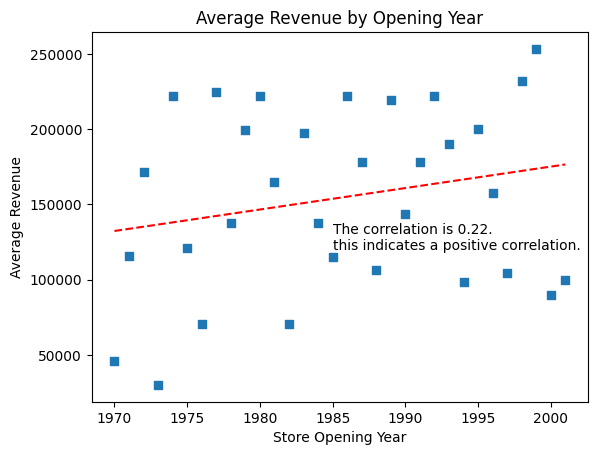

In [27]:
# What is the relationship between store trading duration and revenue?
plt.scatter(x=df5['YearOpened'], y=df5['Average_Revenue'], marker='s')
# Once we have our scatterplot, we can add a trendline to it.
z = np.polyfit(df5['YearOpened'], df5['Average_Revenue'], 1)
p = np.poly1d(z)
plt.plot(df5['YearOpened'], p(df5['YearOpened']), linestyle='--', color='red')
plt.text(x=1985, y=120000, s="The correlation is 0.22. \nthis indicates a positive correlation.")
plt.xlabel("Store Opening Year")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Opening Year")
plt.show()

In [11]:
print(np.corrcoef(df5['YearOpened'], df5['Average_Revenue']))

[[1.         0.22140207]
 [0.22140207 1.        ]]


In [12]:
query6 = """SELECT Squarefeet, AVG(AnnualRevenue) AS Average_Revenue, AVG(NumberEmployees) AS Average_Employees
FROM Sales.vStoreWithDemographics
GROUP BY SquareFeet"""

In [13]:
df6 = pd.read_sql(query6, connection)

C:\Users\rache\AppData\Local\Temp\ipykernel_15868\4089399418.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query6, connection)


In [14]:
df6

,Squarefeet,Average_Revenue,Average_Employees
0,6000,30000.0,3
1,7000,30000.0,5
2,8000,30000.0,5
3,9000,30000.0,5
4,10000,30000.0,5
5,11000,30000.0,7
6,17000,80000.0,10
7,18000,80000.0,13
8,19000,80000.0,15
9,20000,80000.0,14


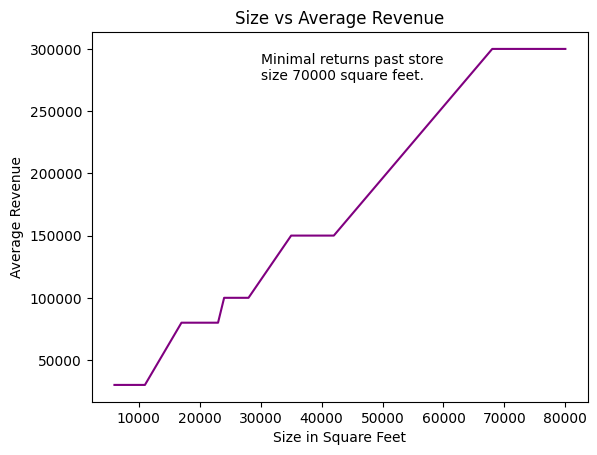

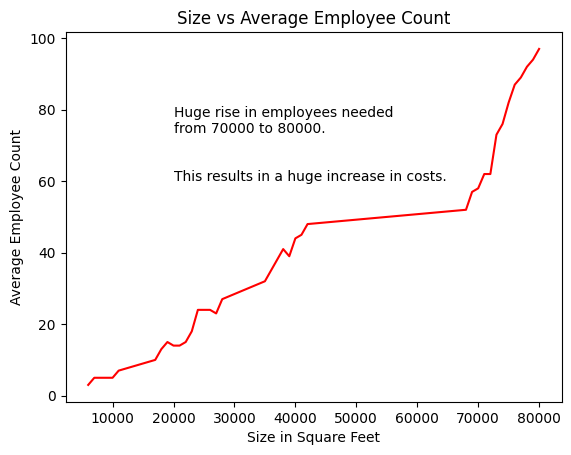

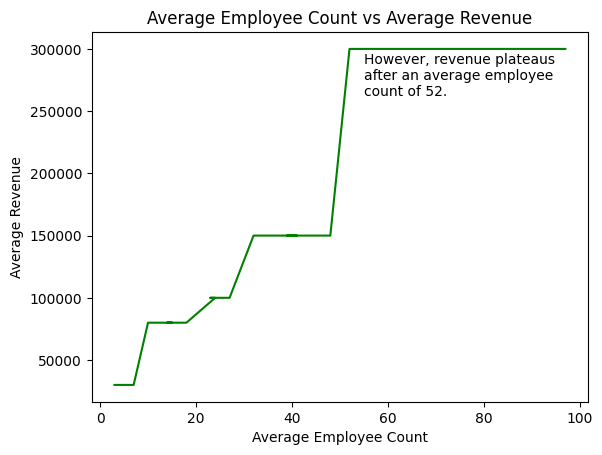

In [25]:
plt.plot(df6['Squarefeet'], df6['Average_Revenue'], label='Size vs Average Revenue', color='purple') # First we plot square feet vs revenue
plt.xlabel('Size in Square Feet') # We also need to label the axes to make it clear what each one is
plt.ylabel('Average Revenue') 
plt.title("Size vs Average Revenue") # And, of course, we need to add a title!
plt.text(x=30000, y=275000, s="Minimal returns past store \nsize 70000 square feet.") # Adding this text will enable us to provide more insights into the data.
plt.show()


plt.plot(df6['Squarefeet'], df6['Average_Employees'], color='red') # We repeat the same process as above twice more, for the other two possible combinations of how the data can look!
plt.xlabel('Size in Square Feet')
plt.ylabel('Average Employee Count')
plt.title("Size vs Average Employee Count")
plt.text(x=20000, y=60, s="Huge rise in employees needed \nfrom 70000 to 80000. \n\n\nThis results in a huge increase in costs.")
plt.show()


plt.plot(df6['Average_Employees'], df6['Average_Revenue'], color='green')
plt.xlabel('Average Employee Count')
plt.ylabel('Average Revenue')
plt.title("Average Employee Count vs Average Revenue")
plt.text(x=55, y=262000, s="However, revenue plateaus \nafter an average employee \ncount of 52.")
plt.show()

In [16]:
connection.close()